In [1]:
from tensorflow import keras

In [2]:
pip show tensorflow

Name: tensorflow
Version: 2.19.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.12/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tensorflow-text, tensorflow_decision_forests, tf_keras


In [3]:
pip show keras

Name: keras
Version: 3.10.0
Summary: Multi-backend Keras
Home-page: 
Author: 
Author-email: Keras team <keras-users@googlegroups.com>
License: Apache License 2.0
Location: /usr/local/lib/python3.12/dist-packages
Requires: absl-py, h5py, ml-dtypes, namex, numpy, optree, packaging, rich
Required-by: keras-hub, tensorflow


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import image_dataset_from_directory
from keras.utils import array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [7]:
import tensorflow.keras as keras

In [9]:
img = load_img(r"/content/drive/MyDrive/g_wagon.jpg")

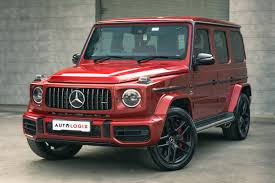

In [10]:
img

In [13]:
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(
        x,
        batch_size=1,
        save_to_dir=r"/content/drive/MyDrive/validation",
        save_prefix='cat',
        save_format='jpeg'):

    i += 1
    if i > 30:
        break  # otherwise the generator would loop indefinitely


In [14]:
from tensorflow.keras.utils import image_dataset_from_directory
from keras.utils import array_to_img ,img_to_array, load_img
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='reflect')
img = load_img(r"/content/drive/MyDrive/g_wagon.jpg")

In [15]:
keras.applications.ResNet50(
include_top=True,
weights="imagenet",
input_tensor=None,
input_shape=None,
pooling=None,
classes=1000,
classifier_activation="softmax",
)

102967424/102967424 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


<Functional name=resnet50, built=True>

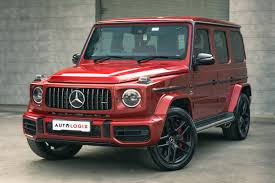

In [16]:
from keras.utils import array_to_img ,img_to_array, load_img
img = load_img(r"/content/drive/MyDrive/g_wagon.jpg")
img

In [19]:
import numpy as np
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

# Load the ResNet-50 model pre-trained on ImageNet data
model = ResNet50(weights='imagenet')

# Load and preprocess the input image
img_path = r"/content/drive/MyDrive/g_wagon.jpg"  # replace with your image file path
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)


In [21]:
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Make predictions
predictions = model.predict(img_array)

# Decode and print the top-3 predicted classes
decoded_predictions = decode_predictions(predictions, top=3)[0]
print("Predictions:")

for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i + 1}: {label} ({score:.2f})")

# Optionally, you can obtain the class index for the top prediction
top_class_index = np.argmax(predictions[0])
print(f"\nTop Prediction Class Index: {top_class_index}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Predictions:
1: jeep (0.60)
2: pickup (0.23)
3: fire_engine (0.06)

Top Prediction Class Index: 609


In [24]:
import numpy as np
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

# Load the ResNet50V2 model pre-trained on ImageNet data
model = ResNet50V2(weights='imagenet')

# Load and preprocess the input image
img_path = r"/content/drive/MyDrive/g_wagon.jpg"  # replace with the path to your image file
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)


In [25]:
predictions = model.predict(img_array)

# Decode and print the top-3 predicted classes
decoded_predictions = decode_predictions(predictions, top=3)[0]
print("Predictions:")

for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i + 1}: {label} ({score:.2f})")

# Optionally, you can obtain the class index for the top prediction
top_class_index = np.argmax(predictions[0])
print(f"\nTop Prediction Class Index: {top_class_index}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
Predictions:
1: jeep (0.49)
2: minibus (0.35)
3: minivan (0.05)

Top Prediction Class Index: 609


In [27]:
import numpy as np
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

# Load the VGG16 model pre-trained on ImageNet data
model = VGG16(weights='imagenet')

# Load and preprocess the input image
img_path = r"/content/drive/MyDrive/g_wagon.jpg"  # replace with the path to your image file
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Make predictions
predictions = model.predict(img_array)

# Decode and print the top-3 predicted classes
decoded_predictions = decode_predictions(predictions, top=3)[0]


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


In [29]:
print("Predictions:")
for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i + 1}: {label} ({score:.2f})")

# Optionally, you can obtain the class index for the top prediction
top_class_index = np.argmax(predictions[0])
print(f"\nTop Prediction Class Index: {top_class_index}")


Predictions:
1: jeep (0.34)
2: pickup (0.23)
3: fire_engine (0.07)

Top Prediction Class Index: 609


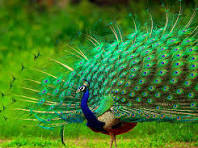

In [30]:
from keras.utils import array_to_img ,img_to_array, load_img
img = load_img(r"/content/drive/MyDrive/validation/peacock_seth.jpg")
img

In [31]:
import numpy as np
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

# Load the VGG16 model pre-trained on ImageNet data
model = VGG16(weights='imagenet')

# Load and preprocess the input image
img_path = r"/content/drive/MyDrive/validation/peacock_seth.jpg"  # replace with the path to your image file
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Make predictions
predictions = model.predict(img_array)

# Decode and print the top-3 predicted classes
decoded_predictions = decode_predictions(predictions, top=3)[0]
print("Predictions:")

for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i + 1}: {label} ({score:.2f})")

# Optionally, you can obtain the class index for the top prediction
top_class_index = np.argmax(predictions[0])
print(f"\nTop Prediction Class Index: {top_class_index}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predictions:
1: peacock (0.98)
2: prairie_chicken (0.02)
3: puffer (0.00)

Top Prediction Class Index: 84


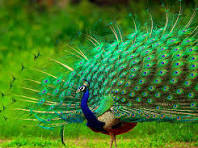

In [32]:
from keras.utils import array_to_img ,img_to_array, load_img
img = load_img(r"/content/drive/MyDrive/validation/peacock_seth.jpg")
img

In [33]:
import numpy as np
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

# Load the VGG19 model pre-trained on ImageNet data
model = VGG19(weights='imagenet')

# Load and preprocess the input image
img_path = r"/content/drive/MyDrive/validation/peacock_seth.jpg"  # replace with your image path
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Make predictions
predictions = model.predict(img_array)

# Decode and print the top-3 predicted classes
decoded_predictions = decode_predictions(predictions, top=3)[0]
print("Predictions:")

for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i + 1}: {label} ({score:.2f})")


574710816/574710816 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 824ms/step
Predictions:
1: peacock (0.92)
2: prairie_chicken (0.07)
3: black_grouse (0.00)


In [34]:
# Optionally, you can obtain the class index for the top prediction
top_class_index = np.argmax(predictions[0])
print(f"\nTop Prediction Class Index: {top_class_index}")


Top Prediction Class Index: 84


In [35]:
import numpy as np
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

# Load the VGG19 model pre-trained on ImageNet data
model = VGG19(weights='imagenet')

# Load and preprocess the input image
img_path = r"/content/drive/MyDrive/validation/peacock_seth.jpg"  # replace with the path to your image file
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Make predictions
predictions = model.predict(img_array)

# Decode and print the top-8 predicted classes
decoded_predictions = decode_predictions(predictions, top=8)[0]
print("Predictions:")

for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i + 1}: {label} ({score:.2f})")

# Optionally, you can obtain the class index for the top prediction
top_class_index = np.argmax(predictions[0])
print(f"\nTop Prediction Class Index: {top_class_index}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 811ms/step
Predictions:
1: peacock (0.92)
2: prairie_chicken (0.07)
3: black_grouse (0.00)
4: ruffed_grouse (0.00)
5: puffer (0.00)
6: cardoon (0.00)
7: partridge (0.00)
8: cock (0.00)

Top Prediction Class Index: 84


In [36]:
import numpy as np
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

# Load the ResNet50V2 model pre-trained on ImageNet data
model = ResNet50V2(weights='imagenet')

# Load and preprocess the input image
img_path = r"/content/drive/MyDrive/validation/peacock_seth.jpg"  # replace with the path to your image file
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Make predictions
predictions = model.predict(img_array)

# Decode and print the top-10 predicted classes
decoded_predictions = decode_predictions(predictions, top=10)[0]
print("Predictions:")

for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i + 1}: {label} ({score:.2f})")

# Optionally, you can obtain the class index for the top prediction
top_class_index = np.argmax(predictions[0])
print(f"\nTop Prediction Class Index: {top_class_index}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Predictions:
1: puffer (0.69)
2: armadillo (0.21)
3: peacock (0.03)
4: lionfish (0.02)
5: weevil (0.01)
6: sea_urchin (0.01)
7: prairie_chicken (0.00)
8: snail (0.00)
9: leaf_beetle (0.00)
10: porcupine (0.00)

Top Prediction Class Index: 397


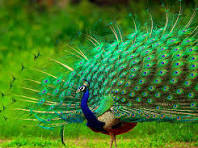

In [37]:
from keras.utils import array_to_img ,img_to_array, load_img
img = load_img(r"/content/drive/MyDrive/validation/peacock_seth.jpg")
img

In [39]:
import numpy as np
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

# Load the ResNet-50 model pre-trained on ImageNet data
model = ResNet50(weights='imagenet')

# Load and preprocess the input image
img_path = r"/content/drive/MyDrive/validation/peacock_seth.jpg"  # replace with the path to your image file
img = image.load_img(img_path, target_size=(224, 224))


In [40]:
import time
import numpy as np
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

# Load the ResNet-50 model pre-trained on ImageNet data
model = ResNet50(weights='imagenet')

# Load and preprocess the input image
img_path = r"/content/drive/MyDrive/validation/peacock_seth.jpg"
img = image.load_img(img_path, target_size=(224, 224))

img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Measure inference time
start_time = time.time()
predictions = model.predict(img_array)
end_time = time.time()

# Decode and print the top-5 predicted classes
decoded_predictions = decode_predictions(predictions, top=5)[0]
print("Predictions:")

for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i + 1}: {label} ({score:.2f})")

# Optionally, you can obtain the class index for the top prediction
top_class_index = np.argmax(predictions[0])
print(f"\nTop Prediction Class Index: {top_class_index}")

# Calculate and print the inference time per step
inference_time_ms = (end_time - start_time) * 1000.0
print(f"Inference Time: {inference_time_ms:.2f} ms")

# Get the size of the model in megabytes
model_size_MB = model.count_params() * 4 / (1024 ** 2)  # 4 bytes for float32
print(f"Size (MB): {model_size_MB:.2f} MB")

# Get the number of parameters and depth from the model's layers
num_parameters = model.count_params()
model_depth = len(model.layers)

print(f"Parameters: {num_parameters}")
print(f"Depth: {model_depth}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Predictions:
1: peacock (1.00)
2: ostrich (0.00)
3: crane (0.00)
4: drake (0.00)
5: black_stork (0.00)

Top Prediction Class Index: 84
Inference Time: 4332.24 ms
Size (MB): 97.80 MB
Parameters: 25636712
Depth: 177


In [41]:
import time
import numpy as np
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

# Load the ResNet50V2 model pre-trained on ImageNet data
model = ResNet50V2(weights='imagenet')

# Load and preprocess the input image
img_path = r"/content/drive/MyDrive/validation/peacock_seth.jpg"  # replace with the path to your image file
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Measure inference time
start_time = time.time()
predictions = model.predict(img_array)
end_time = time.time()

# Decode and print the top-5 predicted classes
decoded_predictions = decode_predictions(predictions, top=5)[0]
print("Predictions:")

for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i + 1}: {label} ({score:.2f})")

# Optionally, you can obtain the class index for the top prediction
top_class_index = np.argmax(predictions[0])
print(f"\nTop Prediction Class Index: {top_class_index}")

# Calculate and print the inference time per step
inference_time_ms = (end_time - start_time) * 1000.0
print(f"Inference Time: {inference_time_ms:.2f} ms")

# Get the size of the model in megabytes
model_size_MB = model.count_params() * 4 / (1024 ** 2)  # 4 bytes for float32
print(f"Size (MB): {model_size_MB:.2f} MB")


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Predictions:
1: puffer (0.69)
2: armadillo (0.21)
3: peacock (0.03)
4: lionfish (0.02)
5: weevil (0.01)

Top Prediction Class Index: 397
Inference Time: 5152.09 ms
Size (MB): 97.71 MB


In [42]:
# Get the number of parameters and depth from the model's layers
num_parameters = model.count_params()
model_depth = len(model.layers)
print(f"Parameters: {num_parameters}")
print(f"Depth: {model_depth}")

Parameters: 25613800
Depth: 192


In [43]:
import numpy as np
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import time

# Load the VGG19 model pre-trained on ImageNet data
model = VGG19(weights='imagenet')

# Load and preprocess the input image
img_path = r"/content/drive/MyDrive/validation/peacock_seth.jpg"  # replace with the path to your image file
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Measure inference time
start_time = time.time()
predictions = model.predict(img_array)
end_time = time.time()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


In [44]:
decoded_predictions = decode_predictions(predictions, top=5)[0]
print("Predictions:")

for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i + 1}: {label} ({score:.2f})")

# Optionally, you can obtain the class index for the top prediction
top_class_index = np.argmax(predictions[0])
print(f"\nTop Prediction Class Index: {top_class_index}")

# Calculate and print the inference time per step
inference_time_ms = (end_time - start_time) * 1000.0
print(f"Inference Time: {inference_time_ms:.2f} ms")

# Get the size of the model in megabytes
model_size_MB = model.count_params() * 4 / (1024 ** 2)  # 4 bytes for float32
print(f"Size (MB): {model_size_MB:.2f} MB")

# Get the number of parameters and depth from the model's layers
num_parameters = model.count_params()
model_depth = len(model.layers)

print(f"Parameters: {num_parameters}")
print(f"Depth: {model_depth}")


Predictions:
1: peacock (0.92)
2: prairie_chicken (0.07)
3: black_grouse (0.00)
4: ruffed_grouse (0.00)
5: puffer (0.00)

Top Prediction Class Index: 84
Inference Time: 1320.45 ms
Size (MB): 548.05 MB
Parameters: 143667240
Depth: 26


In [45]:
import numpy as np
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image


In [47]:
import time

# Load the VGG16 model pre-trained on ImageNet data
model = VGG16(weights='imagenet')

# Load and preprocess the input image
img_path = r"/content/drive/MyDrive/validation/peacock_seth.jpg"  # replace with the path to your image file
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Measure inference time
start_time = time.time()
predictions = model.predict(img_array)
end_time = time.time()

# Decode and print the top-5 predicted classes
decoded_predictions = decode_predictions(predictions, top=5)[0]
print("Predictions:")

for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i + 1}: {label} ({score:.2f})")

# Optionally, you can obtain the class index for the top prediction
top_class_index = np.argmax(predictions[0])
print(f"\nTop Prediction Class Index: {top_class_index}")

# Calculate and print the inference time per step
inference_time_ms = (end_time - start_time) * 1000.0
print(f"Inference Time: {inference_time_ms:.2f} ms")

# Get the size of the model in megabytes
model_size_MB = model.count_params() * 4 / (1024 ** 2)  # 4 bytes for float32
print(f"Size (MB): {model_size_MB:.2f} MB")

# Get the number of parameters and depth from the model's layers
num_parameters = model.count_params()
model_depth = len(model.layers)

print(f"Parameters: {num_parameters}")
print(f"Depth: {model_depth}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 828ms/step
Predictions:
1: peacock (0.98)
2: prairie_chicken (0.02)
3: puffer (0.00)
4: black_grouse (0.00)
5: cock (0.00)

Top Prediction Class Index: 84
Inference Time: 866.07 ms
Size (MB): 527.79 MB
Parameters: 138357544
Depth: 23


In [48]:
import numpy as np
import time
from tensorflow.keras.applications import Xception
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.xception import preprocess_input, decode_predictions

# Load the Xception model pre-trained on ImageNet data
model = Xception(weights='imagenet')

# Load and preprocess the input image
img_path = r"/content/drive/MyDrive/validation/peacock_seth.jpg"  # replace with the path to your image file
img = image.load_img(img_path, target_size=(299, 299))  # Xception requires (299, 299)
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Measure inference time
start_time = time.time()
predictions = model.predict(img_array)
end_time = time.time()

# Decode and print the top-5 predicted classes
decoded_predictions = decode_predictions(predictions, top=5)[0]
print("Predictions:")

for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i + 1}: {label} ({score:.2f})")

# Optionally, you can obtain the class index for the top prediction
top_class_index = np.argmax(predictions[0])
print(f"\nTop Prediction Class Index: {top_class_index}")


91884032/91884032 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step
Predictions:
1: peacock (0.32)
2: prairie_chicken (0.05)
3: limpkin (0.03)
4: cardoon (0.03)
5: puffer (0.03)

Top Prediction Class Index: 84


In [49]:
# Calculate and print the inference time per step
inference_time_ms = (end_time - start_time) * 1000.0
print(f"Inference Time: {inference_time_ms:.2f} ms")

# Model summary provides information about parameters and layers
# model.summary()

# Get the size of the model in megabytes
model_size_MB = model.count_params() * 4 / (1024 ** 2)  # 4 bytes for float32
print(f"Size (MB): {model_size_MB:.2f} MB")

# Get the number of parameters and depth from the model's layers
num_parameters = model.count_params()
model_depth = len(model.layers)

print(f"Parameters: {num_parameters}")
print(f"Depth: {model_depth}")


Inference Time: 19411.11 ms
Size (MB): 87.40 MB
Parameters: 22910480
Depth: 134


In [50]:
import numpy as np
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions

# Load the InceptionV3 model pre-trained on ImageNet data
model = InceptionV3(weights='imagenet')


96112376/96112376 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [51]:
import time

img_path = r"/content/drive/MyDrive/validation/peacock_seth.jpg"  # replace with the path to your image file
img = image.load_img(img_path, target_size=(299, 299))  # InceptionV3 requires input shape (299, 299)
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Measure inference time
start_time = time.time()
predictions = model.predict(img_array)
end_time = time.time()

# Decode and print the top-5 predicted classes
decoded_predictions = decode_predictions(predictions, top=5)[0]
print("Predictions:")

for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i + 1}: {label} ({score:.2f})")

# Optionally, you can obtain the class index for the top prediction
top_class_index = np.argmax(predictions[0])
print(f"\nTop Prediction Class Index: {top_class_index}")

# Calculate and print the inference time per step
inference_time_ms = (end_time - start_time) * 1000.0
print(f"Inference Time: {inference_time_ms:.2f} ms")

# Get the size of the model in megabytes
model_size_MB = model.count_params() * 4 / (1024 ** 2)  # 4 bytes for float32
print(f"Size (MB): {model_size_MB:.2f} MB")

# Get the number of parameters and depth from the model's layers
num_parameters = model.count_params()
model_depth = len(model.layers)

print(f"Parameters: {num_parameters}")
print(f"Depth: {model_depth}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
Predictions:
1: peacock (0.71)
2: pineapple (0.01)
3: ostrich (0.01)
4: porcupine (0.01)
5: puffer (0.01)

Top Prediction Class Index: 84
Inference Time: 8815.80 ms
Size (MB): 90.99 MB
Parameters: 23851784
Depth: 313


In [52]:
import numpy as np
import time
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input, decode_predictions

# Load the MobileNetV2 model pre-trained on ImageNet data
model = MobileNetV2(weights='imagenet')

# Load and preprocess the input image
img_path = r"/content/drive/MyDrive/validation/peacock_seth.jpg"  # replace with the path to your image file
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Measure inference time
start_time = time.time()
predictions = model.predict(img_array)
end_time = time.time()

# Decode and print the top-5 predicted classes
decoded_predictions = decode_predictions(predictions, top=5)[0]
print("Predictions:")

for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i + 1}: {label} ({score:.2f})")

# Optionally, you can obtain the class index for the top prediction
top_class_index = np.argmax(predictions[0])
print(f"\nTop Prediction Class Index: {top_class_index}")


14536120/14536120 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step
Predictions:
1: peacock (0.53)
2: crane (0.05)
3: prairie_chicken (0.03)
4: American_egret (0.02)
5: black_stork (0.02)

Top Prediction Class Index: 84


In [53]:
# Calculate and print the inference time per step
inference_time_ms = (end_time - start_time) * 1000.0
print(f"Inference Time: {inference_time_ms:.2f} ms")

# Model summary provides information about parameters and layers
# model.summary()

# Get the size of the model in megabytes
model_size_MB = model.count_params() * 4 / (1024 ** 2)  # 4 bytes for float32
print(f"Size (MB): {model_size_MB:.2f} MB")

# Get the number of parameters and depth from the model's layers
num_parameters = model.count_params()
model_depth = len(model.layers)

print(f"Parameters: {num_parameters}")
print(f"Depth: {model_depth}")


Inference Time: 12038.45 ms
Size (MB): 13.50 MB
Parameters: 3538984
Depth: 156


In [54]:
import numpy as np
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.densenet import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

# Load the DenseNet121 model pre-trained on ImageNet data
model = DenseNet121(weights='imagenet')

# Load and preprocess the input image
img_path = r"/content/drive/MyDrive/validation/peacock_seth.jpg"  # replace with the path to your image file
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)


33188688/33188688 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [55]:
import time

img_array = preprocess_input(img_array)

# Measure inference time
start_time = time.time()
predictions = model.predict(img_array)
end_time = time.time()

# Decode and print the top-5 predicted classes
decoded_predictions = decode_predictions(predictions, top=5)[0]
print("Predictions:")

for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i + 1}: {label} ({score:.2f})")

# Optionally, you can obtain the class index for the top prediction
top_class_index = np.argmax(predictions[0])
print(f"\nTop Prediction Class Index: {top_class_index}")

# Calculate and print the inference time per step
inference_time_ms = (end_time - start_time) * 1000.0
print(f"Inference Time: {inference_time_ms:.2f} ms")

# Get the size of the model in megabytes
model_size_MB = model.count_params() * 4 / (1024 ** 2)  # 4 bytes for float32
print(f"Size (MB): {model_size_MB:.2f} MB")

# Get the number of parameters and depth from the model's layers
num_parameters = model.count_params()
model_depth = len(model.layers)

print(f"Parameters: {num_parameters}")
print(f"Depth: {model_depth}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
Predictions:
1: peacock (0.83)
2: puffer (0.08)
3: lionfish (0.01)
4: armadillo (0.01)
5: sea_urchin (0.01)

Top Prediction Class Index: 84
Inference Time: 13400.65 ms
Size (MB): 30.76 MB
Parameters: 8062504
Depth: 429


In [56]:
import numpy as np
import time
from tensorflow.keras.applications import NASNetMobile
from tensorflow.keras.applications.nasnet import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image

# Load the NASNetMobile model pre-trained on ImageNet data
model = NASNetMobile(weights='imagenet')

# Load and preprocess the input image
img_path = r"/content/drive/MyDrive/validation/peacock_seth.jpg"  # replace with the path to your image file
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Measure inference time
start_time = time.time()
predictions = model.predict(img_array)
end_time = time.time()

# Decode and print the top-5 predicted classes
decoded_predictions = decode_predictions(predictions, top=5)[0]
print("Predictions:")

for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i + 1}: {label} ({score:.2f})")

# Optionally, you can obtain the class index for the top prediction
top_class_index = np.argmax(predictions[0])
print(f"\nTop Prediction Class Index: {top_class_index}")

# Calculate and print the inference time per step
inference_time_ms = (end_time - start_time) * 1000.0
print(f"Inference Time: {inference_time_ms:.2f} ms")


24227760/24227760 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step
Predictions:
1: peacock (0.76)
2: prairie_chicken (0.02)
3: black_grouse (0.01)
4: ruffed_grouse (0.00)
5: partridge (0.00)

Top Prediction Class Index: 84
Inference Time: 25828.24 ms


In [57]:
# Get the size of the model in megabytes
model_size_MB = model.count_params() * 4 / (1024 ** 2)  # 4 bytes for float32
print(f"Size (MB): {model_size_MB:.2f} MB")

# Get the number of parameters and depth from the model's layers
num_parameters = model.count_params()
model_depth = len(model.layers)

print(f"Parameters: {num_parameters}")
print(f"Depth: {model_depth}")


Size (MB): 20.32 MB
Parameters: 5326716
Depth: 771


In [58]:
import numpy as np
from tensorflow.keras.applications import NASNetLarge
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.nasnet import preprocess_input, decode_predictions

# Load the NASNetLarge model pre-trained on ImageNet data
model = NASNetLarge(weights='imagenet')

# Load and preprocess the input image
img_path = r"/content/drive/MyDrive/validation/peacock_seth.jpg"  # replace with the path to your image file
img = image.load_img(img_path, target_size=(331, 331))  # NASNetLarge requires input shape (331, 331)
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)


359748576/359748576 ━━━━━━━━━━━━━━━━━━━━ 9s 0us/step


In [60]:
import numpy as np
import time
from tensorflow.keras.applications import EfficientNetV2B0
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet_v2 import preprocess_input, decode_predictions

# Load the EfficientNetV2B0 model pre-trained on ImageNet data
model = EfficientNetV2B0(weights='imagenet')

# Load and preprocess the input image
img_path = r"/content/drive/MyDrive/validation/peacock_seth.jpg"  # replace with the path to your image file
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Measure inference time
start_time = time.time()
predictions = model.predict(img_array)
end_time = time.time()

# Decode and print the top-5 predicted classes
decoded_predictions = decode_predictions(predictions, top=5)[0]
print("Predictions:")

for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i + 1}: {label} ({score:.2f})")

# Optionally, you can obtain the class index for the top prediction
top_class_index = np.argmax(predictions[0])
print(f"\nTop Prediction Class Index: {top_class_index}")

# Calculate and print the inference time per step
inference_time_ms = (end_time - start_time) * 1000.0
print(f"Inference Time: {inference_time_ms:.2f} ms")

# Model summary provides information about parameters and layers
# model.summary()

# Get the size of the model in megabytes
model_size_MB = model.count_params() * 4 / (1024 ** 2)  # 4 bytes for float32
print(f"Size (MB): {model_size_MB:.2f} MB")


29403144/29403144 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
Predictions:
1: peacock (0.95)
2: prairie_chicken (0.00)
3: cock (0.00)
4: bustard (0.00)
5: black_stork (0.00)

Top Prediction Class Index: 84
Inference Time: 10267.38 ms
Size (MB): 27.47 MB


In [62]:
import numpy as np
import time
from tensorflow.keras.applications import EfficientNetV2B0
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.efficientnet_v2 import preprocess_input, decode_predictions

# Load the EfficientNetV2B0 model pre-trained on ImageNet data
model = EfficientNetV2B0(weights='imagenet')

# Load and preprocess the input image
img_path = r"/content/drive/MyDrive/validation/peacock_seth.jpg"  # replace with the path to your image file
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

# Measure inference time
start_time = time.time()
predictions = model.predict(img_array)
end_time = time.time()

# Decode and print the top-5 predicted classes
decoded_predictions = decode_predictions(predictions, top=5)[0]
print("Predictions:")

for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
    print(f"{i + 1}: {label} ({score:.2f})")

# Optionally, you can obtain the class index for the top prediction
top_class_index = np.argmax(predictions[0])
print(f"\nTop Prediction Class Index: {top_class_index}")

# Calculate and print the inference time per step
inference_time_ms = (end_time - start_time) * 1000.0
print(f"Inference Time: {inference_time_ms:.2f} ms")

# Model summary provides information about parameters and layers
# model.summary()

# Get the size of the model in megabytes
model_size_MB = model.count_params() * 4 / (1024 ** 2)  # 4 bytes for float32
print(f"Size (MB): {model_size_MB:.2f} MB")


1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step
Predictions:
1: peacock (0.95)
2: prairie_chicken (0.00)
3: cock (0.00)
4: bustard (0.00)
5: black_stork (0.00)

Top Prediction Class Index: 84
Inference Time: 11652.23 ms
Size (MB): 27.47 MB


In [63]:
num_parameters = model.count_params()
model_depth = len(model.layers)
print(f"Parameters: {num_parameters}")
print(f"Depth: {model_depth}")

Parameters: 7200312
Depth: 273
